In [12]:
#Dataloader example

In [1]:
# some packages need async support in jupyter
import nest_asyncio
nest_asyncio.apply()

In [2]:
##!pip install mb_pytorch -U --break-system-packages

In [3]:
from mb_utils.src.logging import logger
from mb_pytorch.utils.yaml_reader import YAMLReader
from mb_pytorch.dataloader.loader import BaseDataset, TorchDataLoader

In [4]:
from mb_pytorch.version import version
version

'1.3.27'

In [5]:
yaml_read = YAMLReader('../scripts/loader_y.yaml') #load the data

In [6]:
yaml_data = yaml_read.read()

In [7]:
yaml_data

{'data': {'file': {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv',
   'verify_image_path': True,
   'verify_image': False}},
 'model': {'model_type': 'detection',
  'model': 'faster_rcnn',
  'use_pretrained': True,
  'use_own_model': False,
  'model_path': '/home/malav/Desktop/mb_packages/mb_pytorch/models/...',
  'model_layer': 'avgpool',
  'device': 'cpu',
  'load_model': False,
  'use_torchvision_models': True,
  'model_name': 'fasterrcnn_resnet50_fpn',
  'model_version': '50',
  'model_backbone': 'resnet',
  'model_optimizer': 'Adam',
  'model_loss': 'cross_entropy',
  'model_scheduler': 'StepLR',
  'model_pretrained': True,
  'model_epochs': 3,
  'model_num_classes': 41,
  'model_initialization': 'None',
  'model_meta_data': {'model_bbox_threshold': 0.8},
  'model_train_parameters': {'Adam': {'lr': 0.001,
    'betas': [0.9, 0.999],
    'eps': 1e-08,
    'weight_decay': 0,
    'amsgrad': False},
   'SGD': {'lr': 0.01,
    'momentum':

In [8]:
BaseDataset?

Init signature:
BaseDataset(
    data_config: Dict[str, Any],
    task_type: str,
    transform: Dict[str, Any] = None,
    is_train: bool = True,
    logger: Optional[Any] = None,
)
Docstring:      Base dataset class supporting classification, detection, and segmentation.
Init docstring:
Initialize dataset.

Args:
    data_config: Dataset configuration
    task_type: Type of task ('classification', 'detection', 'segmentation')
    transform: Optional transform composition
    is_train: Whether this is training data
    logger: Optional logger instance
File:           ~/.local/lib/python3.11/site-packages/mb_pytorch/dataloader/loader.py
Type:           type
Subclasses:     

In [9]:
# from mb_utils.src.logging import logger
train_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'], 
                            transform=yaml_data['transformation'],is_train=True,logger=logger)


Wed 03:06:08,775 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv         
Wed 03:06:08,778 INF Loading DataFrame from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv    
Wed 03:06:08,783 INF Successfully loaded DataFrame with shape (300, 5)                                                               
Wed 03:06:08,788 INF Checking duplicates for columns: ['image_path']                                                                 
Wed 03:06:08,791 INF No duplicates found                                                                                             
Wed 03:06:08,793 INF Removing unnamed columns                                                                                        


In [10]:
val_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'],
                          transform=yaml_data['transformation'],is_train=False,logger=logger)


Wed 03:06:09,898 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv         
Wed 03:06:09,901 INF Loading DataFrame from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv    
Wed 03:06:09,905 INF Successfully loaded DataFrame with shape (300, 5)                                                               
Wed 03:06:09,909 INF Checking duplicates for columns: ['image_path']                                                                 
Wed 03:06:09,911 INF No duplicates found                                                                                             
Wed 03:06:09,913 INF Removing unnamed columns                                                                                        


In [32]:
train_dataloader= TorchDataLoader(dataset=train_dataset, batch_size=yaml_data['train_params']['batch_size'],
                                  shuffle=yaml_data['train_params']['shuffle'],num_workers=yaml_data['train_params']['num_workers'])

In [44]:
val_dataloader= TorchDataLoader(dataset=val_dataset, batch_size=yaml_data['val_params']['batch_size'],
                                shuffle=yaml_data['val_params']['shuffle'],num_workers=yaml_data['val_params']['num_workers'])

In [36]:
for  i in train_dataloader:
    data_i = i
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


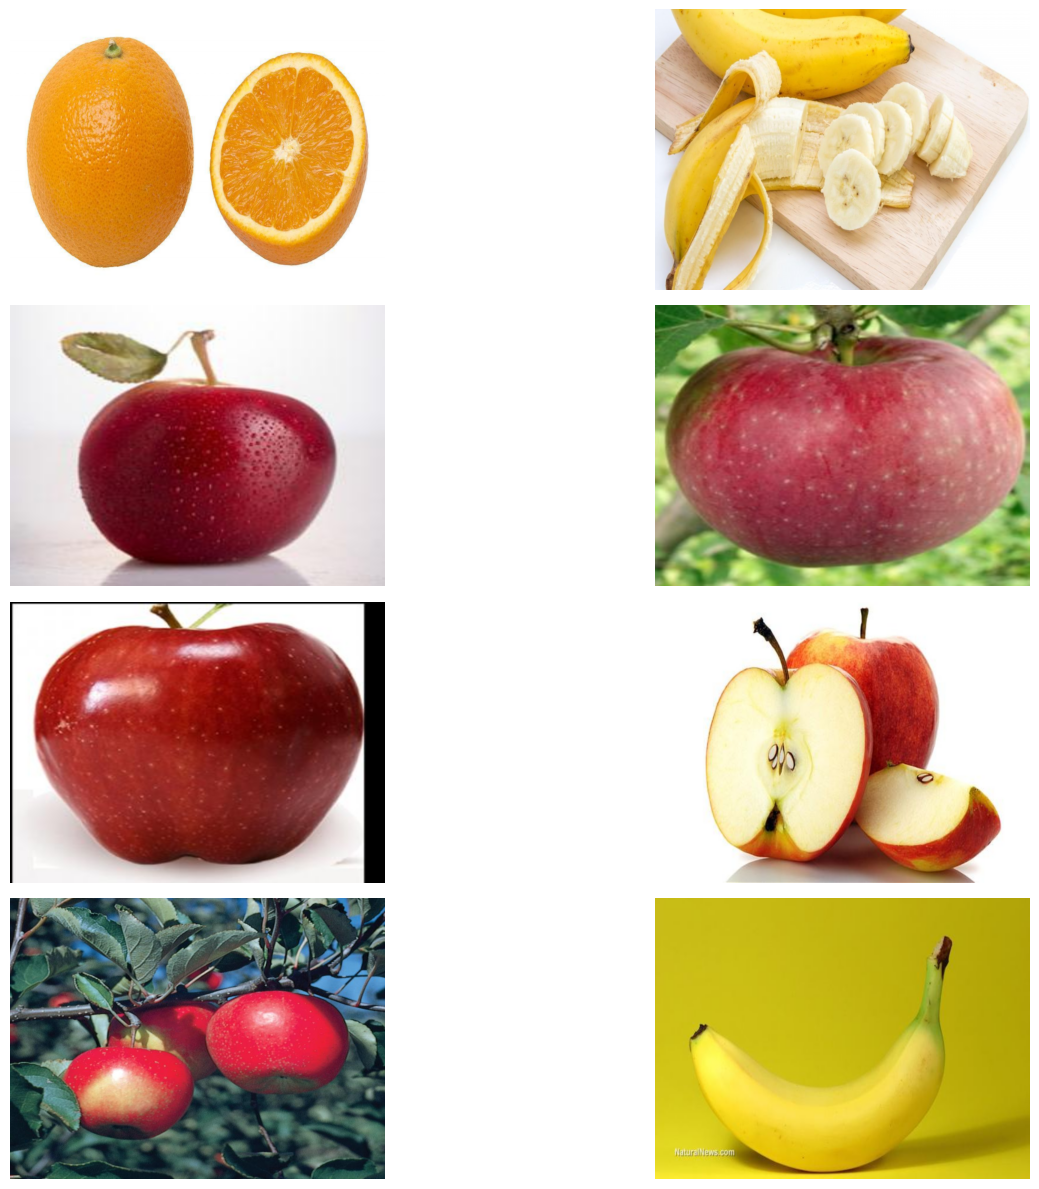

In [43]:
from mb_pytorch.utils.viewer import dynamic_plt_tensor

dynamic_plt_tensor(data_i['image'])

torch.Size([3, 600, 800])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


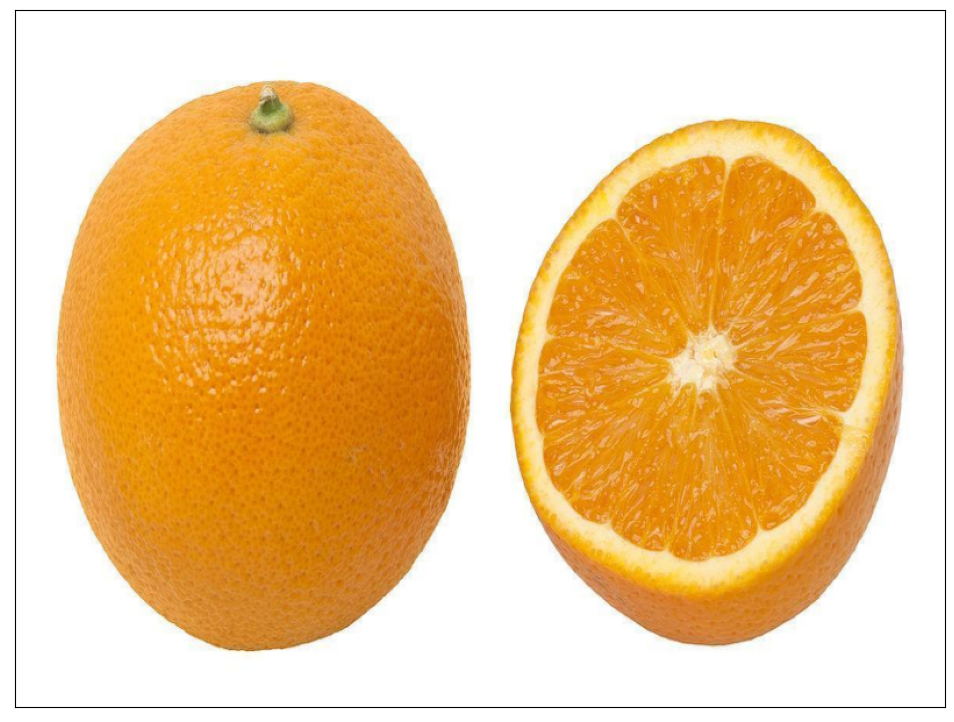

In [29]:
from mb_pytorch.utils.viewer import show_images
for i in train_dataset:
    print(i['image'].shape)
    show_images(i['image'])
    break